In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
df.drop('Pregnancies', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
df.isnull().sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


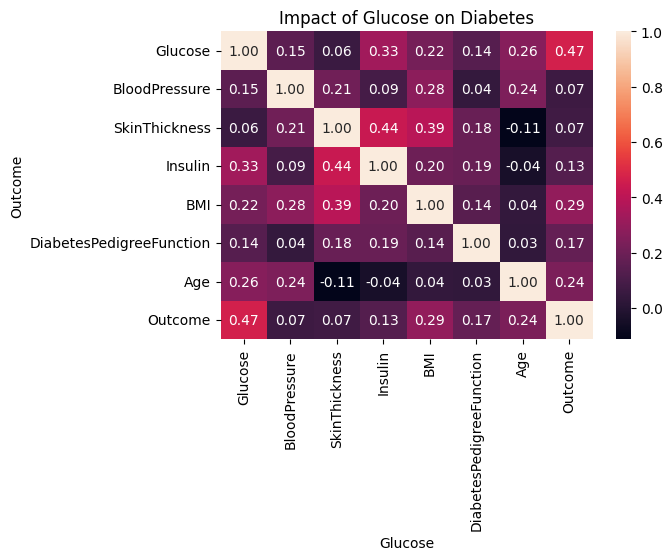

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), fmt=".2f", annot=True)
plt.title('Impact of Glucose on Diabetes')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

In [ ]:
df_selected = df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction','Outcome']]
display(df_selected.head())

,Glucose,BMI,Age,DiabetesPedigreeFunction,Outcome
0,148,33.6,50,0.627,1
1,85,26.6,31,0.351,0
2,183,23.3,32,0.672,1
3,89,28.1,21,0.167,0
4,137,43.1,33,2.288,1


In [ ]:
X = df_selected.drop('Outcome', axis=1)
y = df_selected['Outcome']
display(X.head())
display(y.head())

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,148,33.6,50,0.627
1,85,26.6,31,0.351
2,183,23.3,32,0.672
3,89,28.1,21,0.167
4,137,43.1,33,2.288


,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_selected = df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction','Outcome']]
X = df_selected.drop('Outcome', axis=1)
y = df_selected['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
#model.predict_proba(X_test)

In [ ]:
model.score(X_test,y_test)

0.7727272727272727

In [ ]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
model.coef_

array([[0.03056323, 0.09220858, 0.04386866, 0.56942195]])

In [ ]:
model.intercept_

array([-9.23200049])

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.042 * age - 1.53
    return sigmoid(z)

In [ ]:
sample_input = pd.DataFrame([[98, 89.0, 43, 0.430]])
prediction = model.predict(sample_input)
print(f"The predicted outcome for the sample input is: {prediction[0]}")

The predicted outcome for the sample input is: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
sample_input = pd.DataFrame([[92, 89.0, 0.3, 0.78]])
prediction = model.predict(sample_input)
print(f"The predicted outcome for the sample input is: {prediction[0]}")

The predicted outcome for the sample input is: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


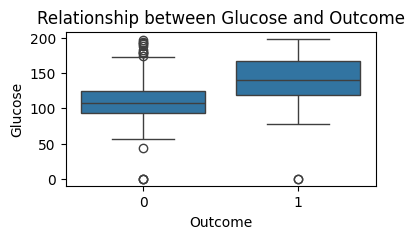

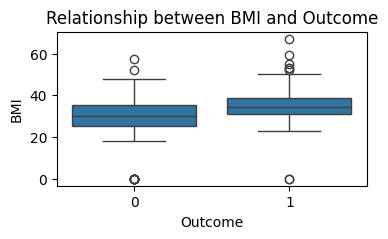

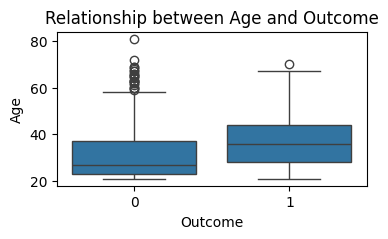

In [ ]:
import seaborn as sns
features_to_visualize = ['Glucose', 'BMI', 'Age']
for feature in features_to_visualize:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x='Outcome', y=feature, data=df_selected)
    plt.title(f'Relationship between {feature} and Outcome')
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_predicted)
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_predicted)
print("Classification Report:")
print(class_report)

Accuracy: 0.7727272727272727
Confusion Matrix:
[[84 15]
 [20 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154

